In [20]:
from __future__ import print_function

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

BASE_PATH = "/home/dsavenk/Projects/octiron/"
LIVEQA_DATA_PATH = BASE_PATH + "data/liveqa/"
LIVEQA_RESULTS_DATA_PATH = LIVEQA_DATA_PATH + "results_15/"
JUDGED_RESULTS_FILE = LIVEQA_RESULTS_DATA_PATH + "emory-Out-of-mEmory"
ANSWERS_FILE = LIVEQA_RESULTS_DATA_PATH + "emory-answers"

In [36]:
import csv

def read_tsv_file(file_path, key_field_extractor):
    answers = dict()
    with open(file_path, 'r') as input_file:
        input_tsv = csv.DictReader(input_file, delimiter='\t')
        for row in input_tsv:
            answers[key_field_extractor(row)] = row
    return answers

def read_judged_results_file(file_path):
    return read_tsv_file(file_path, lambda row: row["QID"])

def read_answers_file(file_path):
    return read_tsv_file(file_path, lambda row: row["QID"][3:])

def get_ya_web_scores(judged_results, answers):
    scores = {"ya": [], "web": [], "idon'tknow": []}
    for qid, result in judged_results.iteritems():
        answer = answers[qid]
        url = answer["RESOURCES"]
        is_yahoo_answers = "ya" if "answers.yahoo.com" in url else "web" if url else "idon'tknow"
        scores[is_yahoo_answers].append(int(result["SCORE"]))
    return scores

In [37]:
judged_results = read_judged_results_file(JUDGED_RESULTS_FILE)
answers = read_answers_file(ANSWERS_FILE)
scores = get_ya_web_scores(judged_results, answers)

# Number of answers
Yahoo!Answers: 513	Web:340	No answer:31
# Average score:
Yahoo!Answers: 1.95712	Web:1.50000
# Number of answers with score > 2
Yahoo!Answers: 153	Web:53


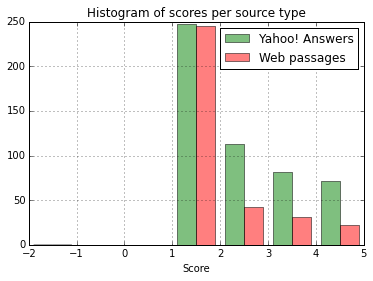

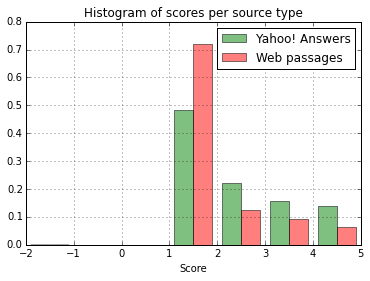

In [46]:
print("# Number of answers\nYahoo!Answers: %d\tWeb:%d\tNo answer:%d" % (len(scores["ya"]), len(scores["web"]), len(scores["idon'tknow"])))
print("# Average score:\nYahoo!Answers: %.5f\tWeb:%.5f" % (1.0 * sum(scores["ya"]) / len(scores["ya"]), 1.0 * sum(scores["web"]) / len(scores["web"])))
print("# Number of answers with score > 2\nYahoo!Answers: %d\tWeb:%d" % (len([score for score in scores["ya"] if score > 2]), len([score for score in scores["web"] if score > 2])))

# the histogram of the data
%matplotlib inline
plt.hist((scores["ya"], scores["web"]), bins=range(-2, 6), color=('green', 'red'), alpha=0.5, label=("Yahoo! Answers", "Web passages"))
plt.xlabel('Score')
plt.title('Histogram of scores per source type')
plt.legend()
plt.grid(True)

plt.figure()
plt.hist((scores["ya"], scores["web"]), normed=True, bins=range(-2, 6), color=('green', 'red'), alpha=0.5, label=("Yahoo! Answers", "Web passages"))
plt.xlabel('Score')
plt.title('Norlamized histogram of scores per source type')
plt.legend()
plt.grid(True)

plt.show()

In [62]:
import operator
answers_by_domain = dict()
for qid, result in judged_results.iteritems():
    answer = answers[qid]
    url = answer["RESOURCES"]
    if url:
        start = url.find("://")
        end = url.find("/", start + 3)
        if end == -1:
            end = len(url) 
        domain = url[start + 3:end]
        if domain not in answers_by_domain:
            answers_by_domain[domain] = [0, []]
        answers_by_domain[domain][0] += 1
        answers_by_domain[domain][1].append(int(result["SCORE"]))
domains = sorted(answers_by_domain.items(), key=operator.itemgetter(1), reverse=True)
print("\n".join(map(str, domains[:20])))

('answers.yahoo.com', [509, [2, 4, 4, 2, 4, 4, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 4, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1, 1, 4, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 4, 1, 1, 4, 1, 3, 2, 4, 4, 1, 1, 3, 1, 4, 4, 2, 4, 2, 3, 4, 3, 1, 4, 1, 1, 2, 2, 1, 4, 2, 3, 3, 1, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 4, 4, 1, 1, 2, 3, 3, 1, 4, 1, 4, 2, 1, 1, 1, 2, 1, 2, 3, 4, 1, 4, 1, 4, 3, 3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 4, 4, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 4, 2, 1, 4, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 4, 3, 1, 3, 1, 2, 2, 4, 3, 3, 1, 1, 3, 1, 2, 2, 4, 2, 1, 1, 4, 1, 2, 4, 1, 4, 2, 4, 1, 2, 1, 4, 2, 1, 1, 4, 1, 3, 2, 4, 1, 1, 4, 1, 3, 1, 1, 3, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3, 2, 1, 4, 1, 3, 4, 2, 1, 3, 4, 2, 4, 1, 1, 4, 1, 1, 3, 1, 2, 1, 2, 2, 1, 4, 1, 1, 2, 2, 3, 2, 4, 1, 2, 2, 4, 3, 1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1, 3, 2, 1,